In [1]:
from tensorflow import keras
import numpy as np
from keras.utils import np_utils
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
input_shape = (256, 256, 1)
def vgg11(input_shape=(224, 224, 3)):
    # Define input layer
    input_layer = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)

    # Flatten and FC layers
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    output_layer = Dense(1, activation='softmax')(x)

    # Define the model
    model = Model(inputs=input_layer, outputs=output_layer)

    return model
vgg11_model=vgg11(input_shape=input_shape)

In [3]:
vgg11_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       295168

In [4]:
image_shape=(256,256)
train_dir="/notebooks/ultrasound/train"
validation_dir=train_dir
test_dir="/notebooks/ultrasound/val"
batch_size=64
test_train_split=0.3

train_data = image_dataset_from_directory(\
      train_dir,color_mode="grayscale",image_size=image_shape ,\
      subset='training',seed=5, validation_split=test_train_split,\
      batch_size=batch_size)
validation_data = image_dataset_from_directory(validation_dir,
      color_mode="grayscale",image_size=image_shape, subset='validation',seed=5,\
      validation_split=test_train_split,batch_size=batch_size)
test_data = image_dataset_from_directory(test_dir,
      color_mode="grayscale",image_size=image_shape, batch_size=batch_size)

Found 8116 files belonging to 2 classes.
Using 5682 files for training.
Found 8116 files belonging to 2 classes.
Using 2434 files for validation.
Found 900 files belonging to 2 classes.


In [5]:
vgg11_model.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [6]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [7]:
history = vgg11_model.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

Epoch 1/100
89/89 [==============================] - 46s 404ms/step - loss: 54.6361 - binary_accuracy: 0.4995 - val_loss: 0.5288 - val_binary_accuracy: 0.4947
Epoch 2/100
89/89 [==============================] - 32s 361ms/step - loss: 0.5114 - binary_accuracy: 0.4995 - val_loss: 0.4433 - val_binary_accuracy: 0.4947
Epoch 3/100
89/89 [==============================] - 32s 359ms/step - loss: 0.4025 - binary_accuracy: 0.4995 - val_loss: 0.3206 - val_binary_accuracy: 0.4947
Epoch 4/100
89/89 [==============================] - 32s 359ms/step - loss: 0.3232 - binary_accuracy: 0.4995 - val_loss: 0.1981 - val_binary_accuracy: 0.4947
Epoch 5/100
89/89 [==============================] - 32s 360ms/step - loss: 0.2174 - binary_accuracy: 0.4995 - val_loss: 0.2088 - val_binary_accuracy: 0.4947
Epoch 6/100
89/89 [==============================] - 32s 361ms/step - loss: 0.1470 - binary_accuracy: 0.4995 - val_loss: 0.1127 - val_binary_accuracy: 0.4947
Epoch 7/100
89/89 [==============================] 

In [8]:
epochs_run=len(history.epoch)

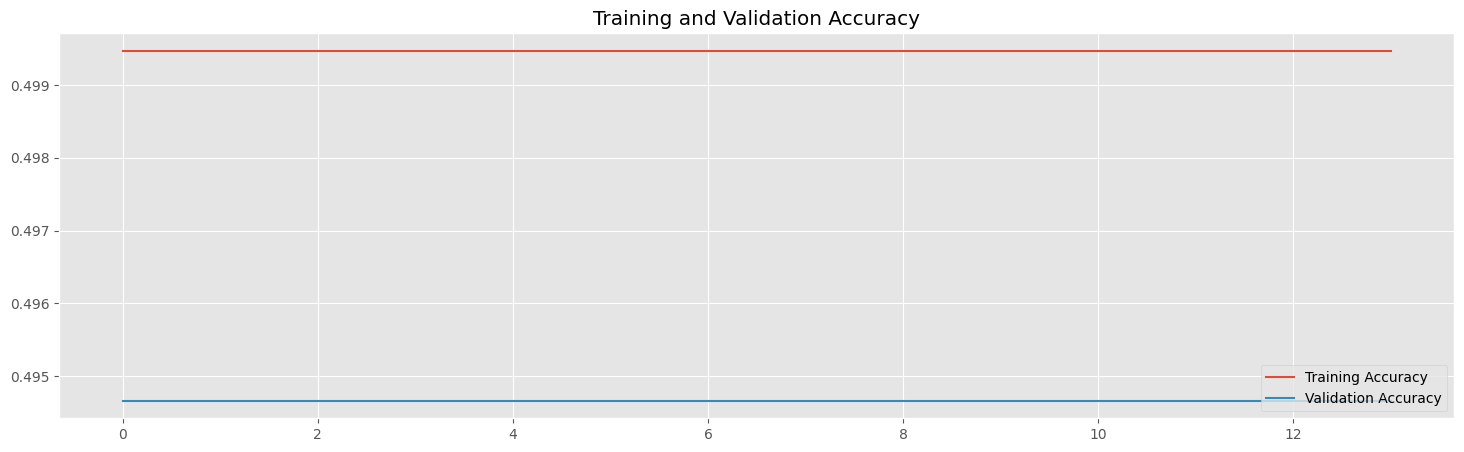

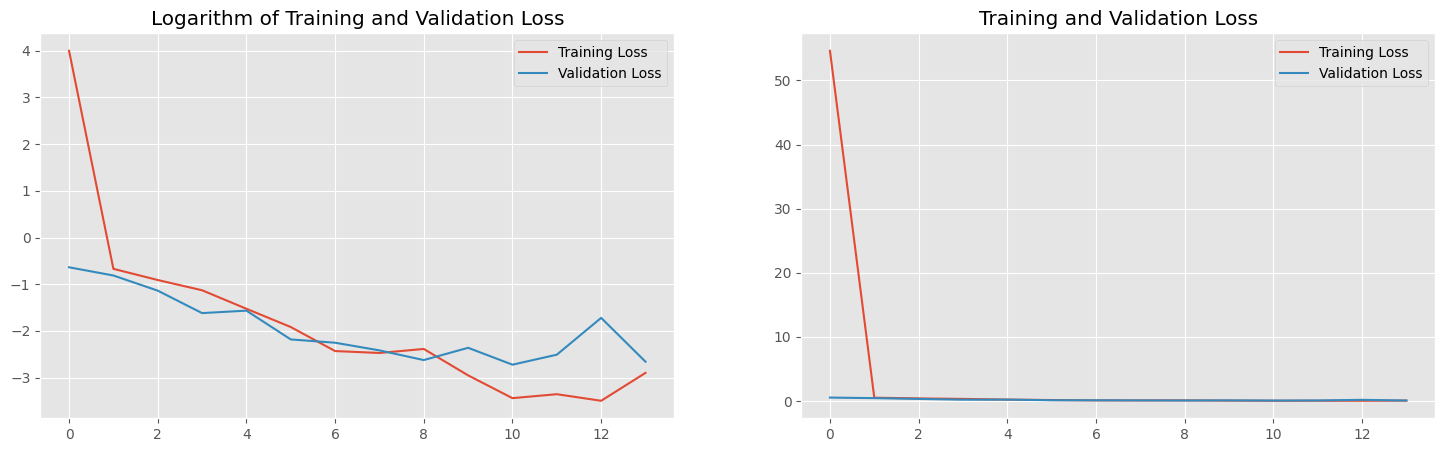

In [9]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()


In [10]:
results = vgg11_model.evaluate(test_data)
print("test loss, test acc:", results)

15/15 [==============================] - 2s 132ms/step - loss: 1.9827 - binary_accuracy: 0.4444
test loss, test acc: [1.9826587438583374, 0.4444444477558136]


In [11]:
# vgg16_model.save("../models/vgg16_0_ultrasound")